# A shared-reflector isomorphic Yagi

In [1]:
from isomorphic_yagis import differential_evolution, evaluate_antenna
from isomorphic_yagis.utils import BANDS, PARAMETER_LIMITS, plot_population, plot_results

In [2]:
# For a single reflector, we have to override the size of all reflectors to be the same
# Here, we're setting them all to whatever the 20m reflector is, arbitrarily
override_values = {f"reflector_length_{band}": "reflector_length_20" for band in BANDS}

# To allow the reflector a full range in parameter space, we have to override its limits
# Overriding is the last thing that happens when clipping an antenna to its limits, so
# we only have to override the size of the reflector we are setting all others to
parameter_limits = PARAMETER_LIMITS | {"reflector_length_20": (0.01, 0.99)}


In [3]:
# We'll run a differential evolution experiment with 200 antennas, 
# for 100 generations, with these parameter limits and override values
results = differential_evolution(
    n_population=500, 
    n_generations=200, 
    limits=parameter_limits, 
    override_values=override_values
)

2023-07-07 18:48:23,675	INFO worker.py:1636 -- Started a local Ray instance.
100%|██████████| 200/200 [3:07:53<00:00, 56.37s/it]    


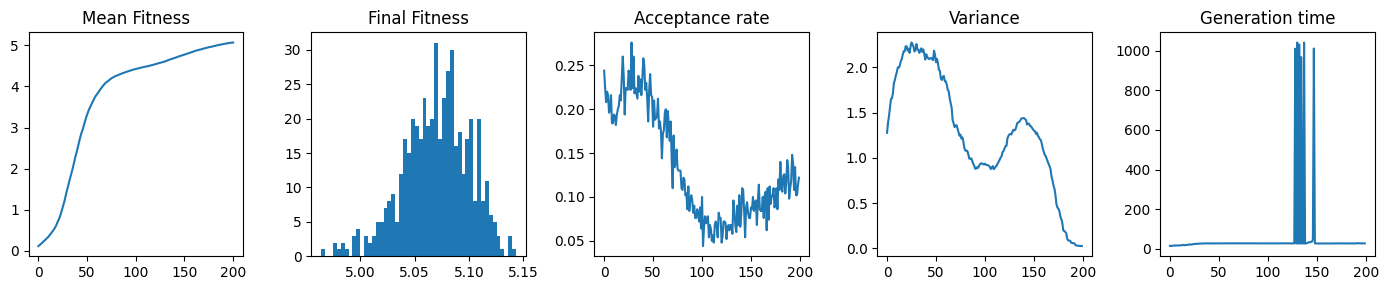

In [4]:
# How'd our experiment go ?
antennas, best_antenna = plot_results(results)

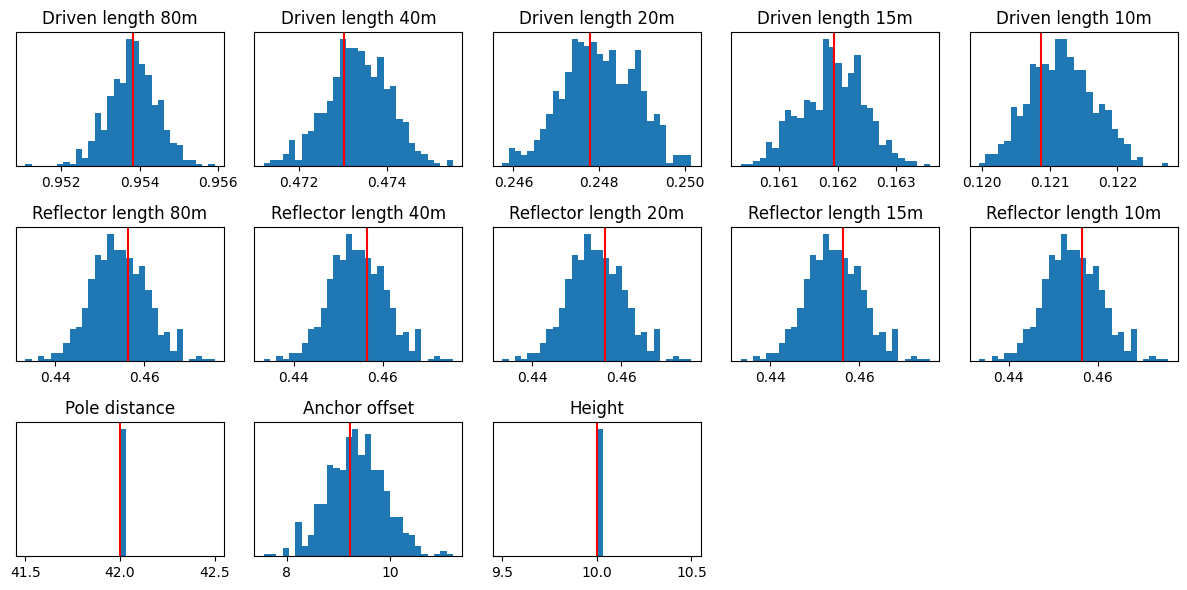

In [5]:
# What does the final antenna population look like ?
plot_population(antennas, results["fitness"])

In [6]:
# Which is our best antenna ?
best_antenna

{'driven_length_80': 0.9538276321664246,
 'reflector_length_80': 0.45639602316963673,
 'driven_length_40': 0.473031336388412,
 'reflector_length_40': 0.45639602316963673,
 'driven_length_20': 0.24777433047977301,
 'reflector_length_20': 0.45639602316963673,
 'driven_length_15': 0.16193707276558894,
 'reflector_length_15': 0.45639602316963673,
 'driven_length_10': 0.12087412602784864,
 'reflector_length_10': 0.45639602316963673,
 'anchor_offset': 9.224744218072333,
 'pole_distance': 42.0,
 'height': 10.0}

In [7]:
# How does it perform on various bands ?
evaluate_antenna(best_antenna, write=True)

{'80': {'gain': 5.915054, 'swr': 1.01634970097536},
 '40': {'gain': 8.859409, 'swr': 1.0128241903293298},
 '20': {'gain': 6.80815, 'swr': 1.4931466804154927},
 '15': {'gain': 8.080718, 'swr': 1.3753879830575537},
 '10': {'gain': 7.990572, 'swr': 1.5106086591519856}}